In [64]:
import os
import requests
import pandas as pd
import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [65]:
# Set current amount of shares data
shares_data = {
    "shares": [25, 25, 25, 25]}

# Set the tickers
tickers = ["TM", "FCAU", "GM", "F"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
TM,25
FCAU,25
GM,25
F,25


In [66]:
load_dotenv("env.txt")

True

In [67]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [68]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [69]:
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
timeframe = "1Day"

In [70]:
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [71]:
TM = df_portfolio[df_portfolio['symbol']=='TM'].drop('symbol', axis=1)
FCAU = df_portfolio[df_portfolio['symbol']=='FCAU'].drop('symbol', axis=1)
GM = df_portfolio[df_portfolio['symbol']=='GM'].drop('symbol', axis=1)
F = df_portfolio[df_portfolio['symbol']=='F'].drop('symbol', axis=1)

In [72]:
df_portfolio = pd.concat([TM, FCAU, GM, F],axis=1, keys=["TM", "FCAU", "GM", "F"])
df_portfolio

TM                                              \
                             open    high     low   close  volume trade_count   
timestamp                                                                       
2020-07-14 04:00:00+00:00  125.15  126.63  125.15  126.43  191895        3525   

                                        FCAU               ...        GM  \
                                 vwap   open  high    low  ...    volume   
timestamp                                                  ...             
2020-07-14 04:00:00+00:00  125.953315  10.06  10.3  10.05  ...  16477078   

                                                     F                    \
                          trade_count       vwap  open  high   low close   
timestamp                                                                  
2020-07-14 04:00:00+00:00      100763  25.429475  6.18  6.39  6.08  6.36   

                                                            
                              volume trade_count      vwap  
timestamp                                                   
2020-07-14 04:00:00+00:00  106131848      168357  6.278597  

[1 rows x 28 columns]

In [73]:
TM_price = float(df_portfolio["TM"]["close"])
FCAU_price = float(df_portfolio["FCAU"]["close"])
GM_price = float(df_portfolio["GM"]["close"])
F_price = float(df_portfolio["F"]["close"])

In [74]:
TM_value = TM_price * df_shares.loc["TM"]["shares"]
FCAU_value = FCAU_price * df_shares.loc["FCAU"]["shares"]
GM_value = GM_price * df_shares.loc["GM"]["shares"]
F_value = F_price * df_shares.loc["F"]["shares"]

In [75]:
print(f"The current value of the {df_shares.loc['TM']['shares']} TM shares is ${TM_value:0.2f}")
print(f"The current value of the {df_shares.loc['FCAU']['shares']} FCAU shares is ${FCAU_value:0.2f}")
print(f"The current value of the {df_shares.loc['GM']['shares']} GM shares is ${GM_value:0.2f}")
print(f"The current value of the {df_shares.loc['F']['shares']} F shares is ${F_value:0.2f}")

The current value of the 25 TM shares is $3160.75
The current value of the 25 FCAU shares is $257.00
The current value of the 25 GM shares is $641.00
The current value of the 25 F shares is $159.00


In [76]:
value_data = {
    "TM": [TM_value],
    "FCAU": [FCAU_value],
    "GM": [GM_value],
    "F": [F_value]
}

In [77]:
df_value = pd.DataFrame(value_data)
df_value

,TM,FCAU,GM,F
0,3160.75,257.0,641.0,159.0


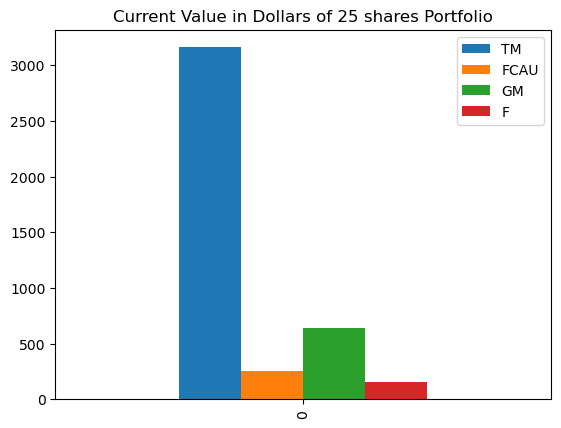

In [78]:
df_value.plot.bar(title="Current Value in Dollars of 25 shares Portfolio");

In [79]:
df_value.hvplot.bar()

:Bars   [index,Variable]   (value)